In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:

stratified_kfold = StratifiedKFold(n_splits=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []  # To store confusion matrices



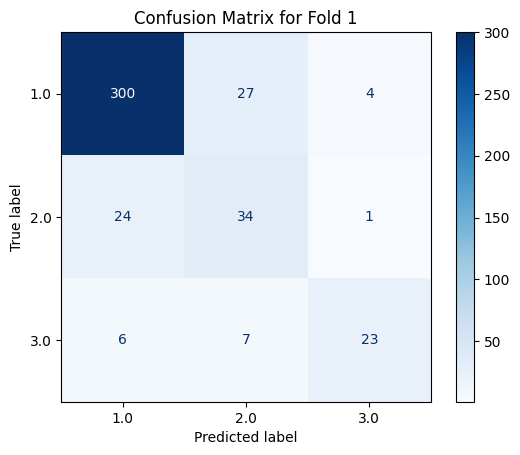

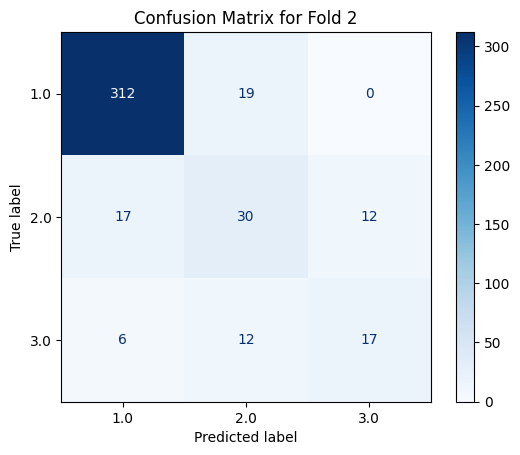

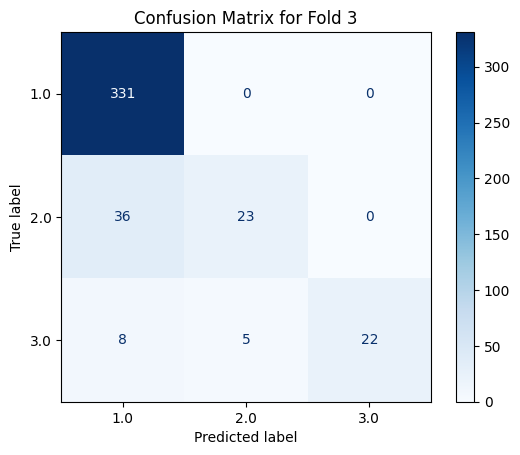

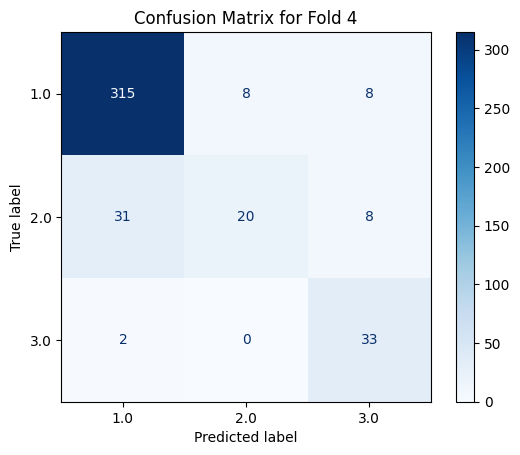

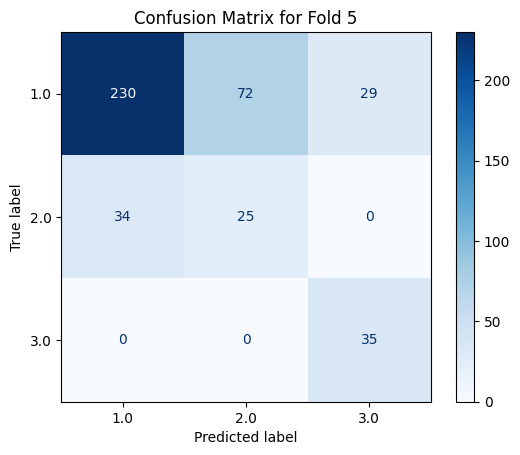

Mean Accuracy = 0.8231350455675228
Mean Precision = 0.727514318216399
Mean Recall = 0.6952525439713724
Mean F1-score = 0.6894960216205199
Standard Deviation Accuracy = 0.07228417153505332
Standard Deviation Precision = 0.11286835688632929
Standard Deviation Recall = 0.03363640906444157
Standard Deviation F1-score = 0.053818692758643726


In [4]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_classifier = SVC(kernel='linear')  
    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {i + 1}')
    plt.show()
    
# Calculate and print the mean and standard deviation of metrics
print("Mean Accuracy =", np.mean(accuracy_scores))
print("Mean Precision =", np.mean(precision_scores))
print("Mean Recall =", np.mean(recall_scores))
print("Mean F1-score =", np.mean(f1_scores))

print("Standard Deviation Accuracy =", np.std(accuracy_scores))
print("Standard Deviation Precision =", np.std(precision_scores))
print("Standard Deviation Recall =", np.std(recall_scores))
print("Standard Deviation F1-score =", np.std(f1_scores))



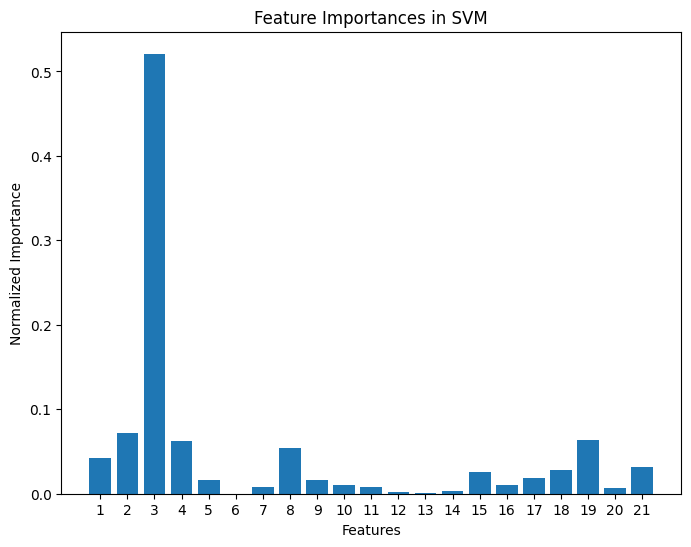

In [5]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()


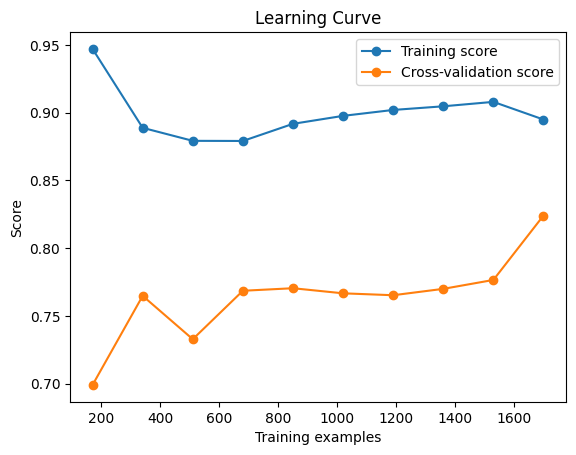

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()